In [6]:
pip install biopython matplotlib seaborn pandas squarify

Defaulting to user installation because normal site-packages is not writeable
    matplotlib (>=3.0.*)
                ~~~~~~^
    opencv-python (>=3.) ; extra == 'all'
                  ~~~~^
    extract-msg (<=0.29.*)
                 ~~~~~~~^
Note: you may need to restart the kernel to use updated packages.


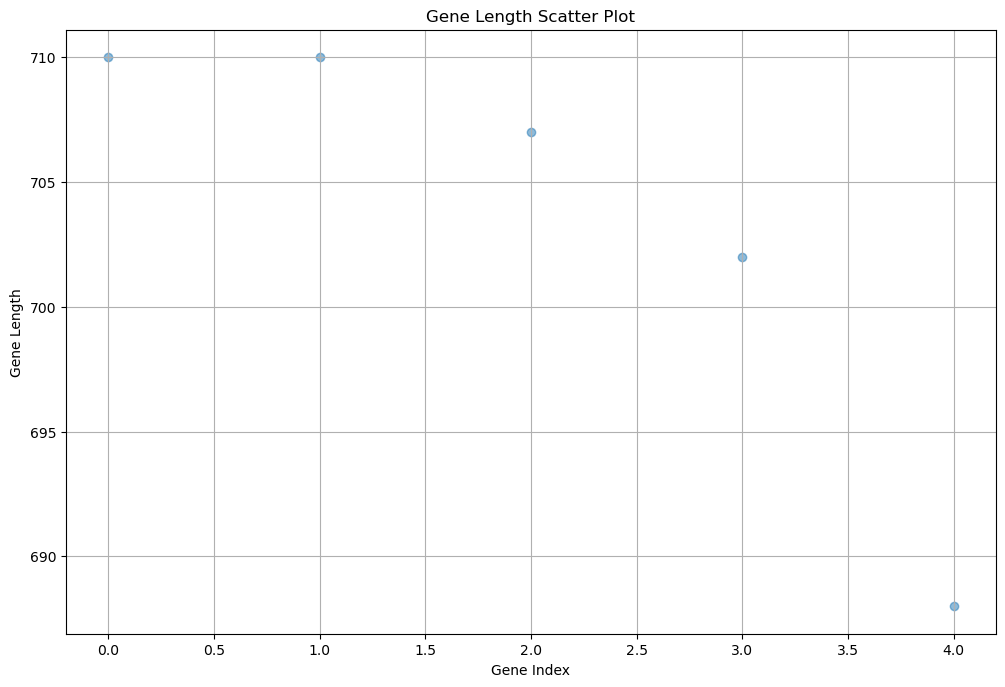

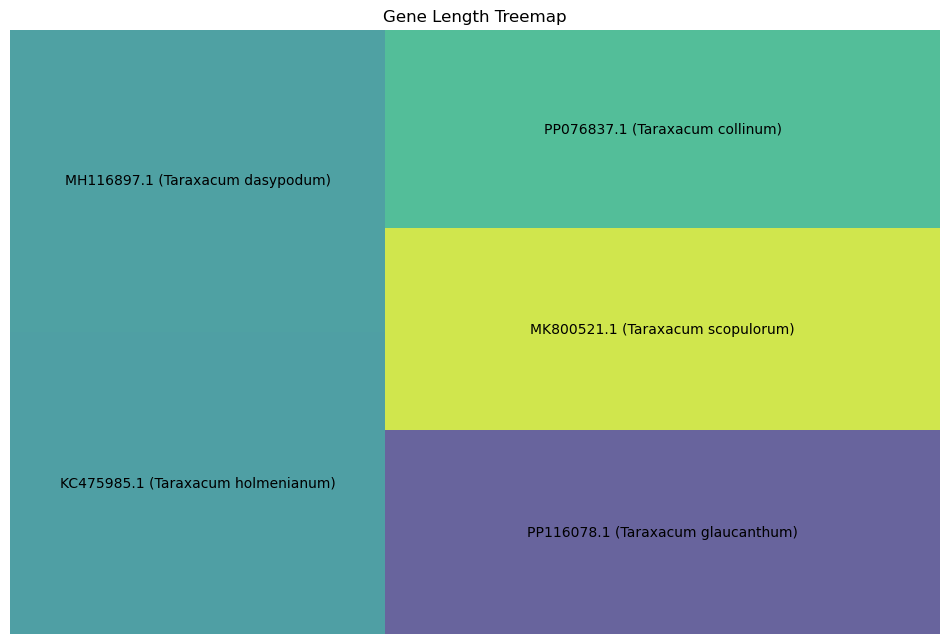

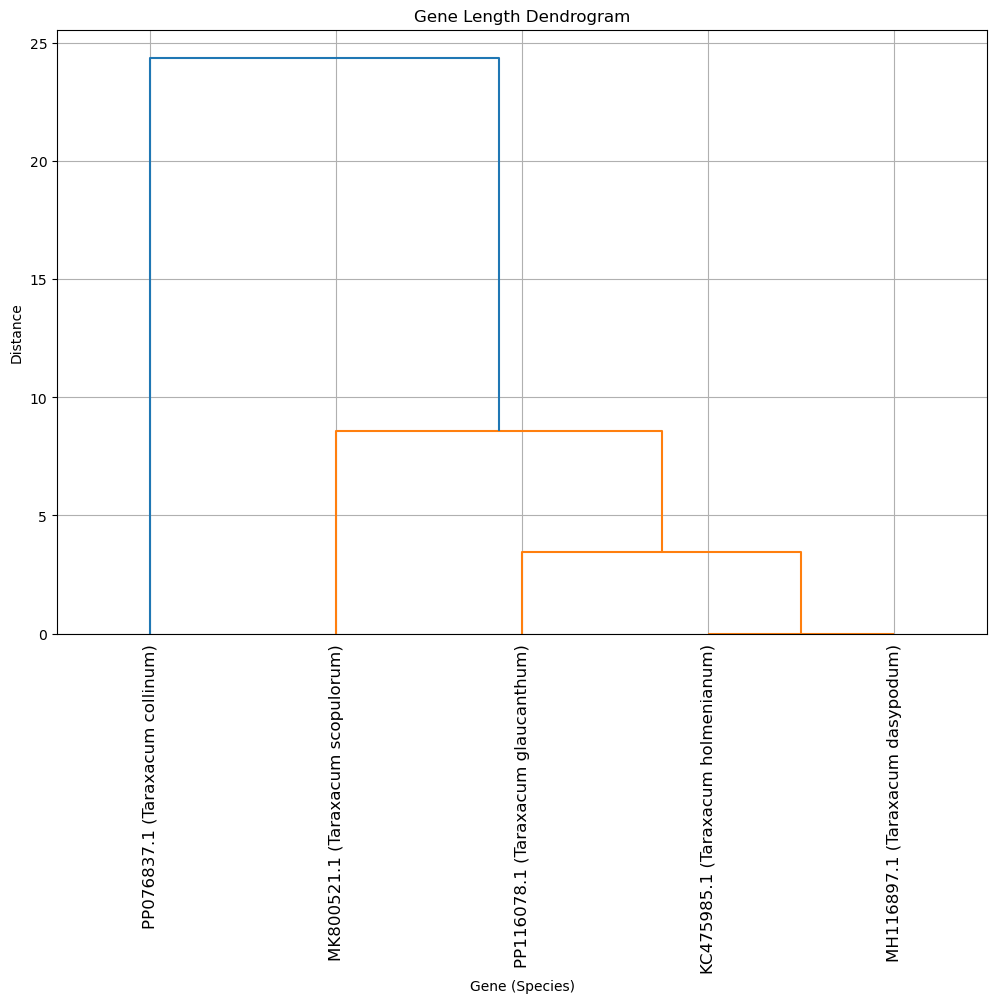

In [8]:
import os
import matplotlib.pyplot as plt
from Bio import SeqIO
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.cluster.hierarchy as sch
import squarify

# Function to extract gene lengths and labels from a FASTA file
def extract_gene_lengths_and_labels(fasta_file):
    gene_lengths = []
    gene_labels = []
    for record in SeqIO.parse(fasta_file, "fasta"):
        gene_lengths.append(len(record.seq))
        # Extract species name from the description (assuming it's present)
        description_parts = record.description.split()
        species_name = " ".join(description_parts[1:3])  # Adjust based on your FASTA file format
        gene_labels.append(f"{record.id} ({species_name})")
    return gene_lengths, gene_labels

# Use the relative path to your FASTA file now that you're in the correct directory
fasta_file = "Project_1_matK_Taraxacum.fasta"

# Extract gene lengths and labels
gene_lengths, gene_labels = extract_gene_lengths_and_labels(fasta_file)

# Create a DataFrame for easier plotting with seaborn and pandas
data = pd.DataFrame({
    'Gene': gene_labels,
    'Length': gene_lengths
})

# Scatter plot
plt.figure(figsize=(12, 8), dpi=100)
plt.scatter(range(len(gene_lengths)), gene_lengths, alpha=0.5)
plt.title('Gene Length Scatter Plot')
plt.xlabel('Gene Index')
plt.ylabel('Gene Length')
plt.grid(True)
plt.savefig('scatter_plot.png', dpi=300)
plt.show()

# Treemap
plt.figure(figsize=(12, 8), dpi=100)
squarify.plot(sizes=data['Length'], label=data['Gene'], alpha=0.8)
plt.title('Gene Length Treemap')
plt.axis('off')
plt.savefig('treemap.png', dpi=300)
plt.show()

# Branch tree (Dendrogram)
plt.figure(figsize=(12, 8), dpi=100)
dendrogram = sch.dendrogram(sch.linkage(np.array(gene_lengths).reshape(-1, 1), method='ward'), labels=gene_labels)
plt.title('Gene Length Dendrogram')
plt.xlabel('Gene (Species)')
plt.ylabel('Distance')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.grid(True)
plt.savefig('dendrogram.png', dpi=300)
plt.show()
